In [ ]:
url = 'https://raw.githubusercontent.com/allanspadini/linear_estatistica/main/winequality-red.csv'

https://archive.ics.uci.edu/ml/datasets/Wine

P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis.
Modeling wine preferences by data mining from physicochemical properties. In Decision Support Systems, Elsevier, 47(4):547-553, 2009.

In [ ]:
import pandas as pd

In [ ]:
vinho = pd.read_csv(url, sep=';')

In [ ]:
vinho.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
vinho.shape

(1599, 12)

# Qual a chance da nossa amostra retratar a realidade?

O **nível de confiança** ($1 - \alpha$) representa a probabilidade de acerto da estimativa. De forma complementar o **nível de significância** ($\alpha$) expressa a probabilidade de erro da estimativa.

O **nível de confiança** representa o grau de confiabilidade do resultado da estimativa estar dentro de determinado intervalo. Quando fixamos em uma pesquisa um **nível de confiança** de 95%, por exemplo, estamos assumindo que existe uma probabilidade de 95% dos resultados da pesquisa representarem bem a realidade, ou seja, estarem corretos.

O **nível de confiança** de uma estimativa pode ser obtido a partir da área sob a curva normal como ilustrado na figura abaixo.

![alt text](https://caelum-online-public.s3.amazonaws.com/1178-estatistica-parte2/01/img007.png)

## Erro inferencial

O **erro inferencial** é definido pelo **desvio padrão das médias amostrais** $\sigma_\bar{x}$ e pelo **nível de confiança** determinado para o processo.

# $$e = z \frac{\sigma}{\sqrt{n}}$$

Suponha que a densidade do vinho se distribui aproximadamente como uma normal. Calcule o desvio padrão e a média de uma amostra de 1000 elementos. Construa um intervalo de confiança para a média populacional assumindo um **nível de significância de 5%**.

In [ ]:
amostra = vinho.sample(n=1000, random_state=202)

In [ ]:
desvio_padrao = amostra['density'].std()

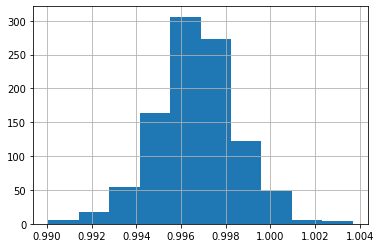

In [ ]:
amostra['density'].hist()

In [ ]:
significancia = 0.05

In [ ]:
confianca = 1 - significancia

In [ ]:
n= 1000

### Obtendo z - Tabela normal padronizada.

![alt text](https://caelum-online-public.s3.amazonaws.com/1178-estatistica-parte2/01/img008.png)

### Valores de $z$ para os níveis de confiança mais utilizados

|Nível de<br>confiança|Valor da área sob<br>a curva normal| $z$ |
|:----------------:|:---------------------------------:|:---:|
|90%               |0,95                               |1,645|
|95%               |0,975                              |1,96 |
|99%               |0,995                              |2,575|

Obtendo o **desvio padrão das médias amostrais** $\sigma_\bar{x}$

In [ ]:
import numpy as np

In [ ]:
sigma = desvio_padrao/np.sqrt(n)

Obtendo o $e$

In [ ]:
z = 1.96

In [ ]:
erro = z*sigma

In [ ]:
erro

0.00011422344106370019

### Calculando o intervalo de confiança

In [ ]:
media_amostra = amostra['density'].mean()

In [ ]:
intervalo = [media_amostra - erro,media_amostra+erro]

In [ ]:
intervalo

[0.9965902065589372, 0.9968186534410646]

In [ ]:
from scipy.stats import norm

In [ ]:
norm.interval(alpha=0.95, loc=media_amostra, scale=sigma)

(0.9965902086578197, 0.9968186513421821)

## Calculando o tamanho da amostra

Vamos assumir que queremos um erro máximo de 0.0001, nível de confiança de 95% e o desvio padrão populacional é 0.0019.

\begin{equation}
e = z \frac{\sigma}{\sqrt{n}}
\end{equation}
Com desvio padrão conhecido
\begin{equation}
n = \left( z \frac{\sigma}{e} \right)^2
\end{equation}
Com desvio padrão desconhecido
\begin{equation}
n = \left( z \frac{s}{e} \right)^2
\end{equation}


In [ ]:
0.95+0.025

0.975

In [ ]:
z = norm.ppf(0.975)

In [ ]:
sigma= 0.0019

In [ ]:
erro = 0.0001

In [ ]:
n = (z*sigma/erro)**2

In [ ]:
n

1386.766634270579

## População finita
\begin{equation}
n = \frac{z^2 \sigma^2 N}{z^2 \sigma^2 + e^2(N-1)}

\end{equation}

In [ ]:
N = 1500

In [ ]:
((z**2)*(sigma**2)*N)/((z**2)*(sigma**2)+ (erro**2)*(N-1))

720.8309662682263